# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?

The distplot below indicates that the body temperatures fall into a normal distribution.

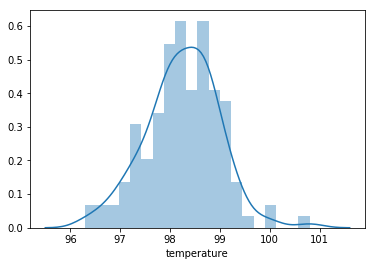

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(df.temperature, bins=20)
pass

## 2. Is the sample size large? Are the observations independent?
The sample size is 130, so it is large enough for CLT to hold true. CLT should apply if the sample size is >= 30.

In [4]:
len(df)

130

## 3. Is the true population mean really 98.6 degrees F?

Let's get some basic sample statistics:

In [5]:
sample_mean = df.temperature.mean()
sample_sd = df.temperature.std()
sample_mean, sample_sd

(98.249230769230749, 0.73318315803894563)

We have a mean value for the population (&mu;), but we don't yet have a population standard deviation. With the knowledge that we have now, a **one sample t-test** will best suit our needs, because even though we know the population mean, we don't have the population standard deviation. Let's define the known parameters:

 - Null hypothesis:           $H_0 => \mu = 98.6^{\circ} Fahrenheit$
 - Alternate hypothesis:      $H_1 => \mu \neq 98.6^{\circ} Fahrenheit$
 - Sample mean:               $\bar{X} = 98.25^{\circ}Fahrenheit$
 - Sample standard deviation: $S = 0.73$
 - Sample size: $n = 130$

Given these parameters, the t-statistic for a one-sample test can be calculated as follows:
$$t= \frac{\bar{X}-\mu}{\frac{S}{\sqrt{n}}}$$

In [6]:
import math
pop_mean = 98.6
n=len(df)
t_statistic = (sample_mean - pop_mean)/(sample_sd/math.sqrt(n))
t_statistic

-5.4548232923645195

Let's assume that we can accept the null hypothesis if there is less than 1% chance of this sample not being picked by chance. That is, if our t statistic falls within the critical range for 99% probability, we will fail to reject the null hypothesis and will need to continue under the assumption that the mean temperature of the human population is 98.6 degrees F.

To determine this, we will need to determine our t_critical value. For a two-tailed interval, we'll need to use the probability 0.005 to get the t-critical value for 1% probability.

In [7]:
import scipy.stats as stats
degrees_of_freedom = len(df) - 1
stats.t.isf(0.005, degrees_of_freedom)

2.6144786796997836

Given that our t-statistic is negative, it's still much less than the actual t-critical value of -2.614. Therefore, we can safely reject our null hypothesis, and say that the mean temperature of the human population is 99% likely to be different from 98.6 degrees Fahrenheit. In other words, our sample does not represent the population if the mean temperature of the population is 98.6 defrees Fahrenheit.

In [8]:
#z-stat
pop_sd = sample_sd/math.sqrt(degrees_of_freedom)
z_statistic = (sample_mean - pop_mean)/pop_sd
z_statistic

-5.4338027005241081

So same result as the t-statistic. 

## At what temperature should we consider someone's temperature to be "abnormal"?
 - Start by computing the margin of error and confidence interval.

In the last step, we rejected the null hypothesis. To determine an interval for the population mean, we'll need to calculate the standard error as below:
$$SE = \frac{S}{\sqrt{n}}$$

In [9]:
standard_error = sample_sd/math.sqrt(n)
standard_error

0.064304416837891024

In [10]:
population_mean = (sample_mean-standard_error, sample_mean+standard_error)

In [11]:
population_mean

(98.184926352392864, 98.313535186068634)

At this point I'm really not sure whether proceeding to just calculate the margin of error and confidence interval is the right thing to do, to answer the question. One way of approaching this is to assume the population standard deviation to be equal to the standard error (sample standard deviation/sqrt(degrees of freedom)) and proceed to calculate the margins of error and confidence intervals for the two ends of the range that we have determined our population mean to lie in.

## 5. Is there a significant difference between males and females in normal temperature?
What test did you use and why?

Write a story with your conclusion in the context of the original problem.

In [12]:
male_sample = df[df.gender == 'M']
female_sample = df[df.gender == 'F']
male_sample_mean = male_sample.temperature.mean()
male_sample_sd = male_sample.temperature.std()
female_sample_mean = female_sample.temperature.mean()
female_sample_sd = female_sample.temperature.std()

In [13]:
print (female_sample_mean, male_sample_mean)
print (female_sample_sd, male_sample_sd)

98.3938461538 98.1046153846
0.743487752731 0.698755762327


In [14]:
female_sample_mean - male_sample_mean

0.28923076923076962

Right off the bat, it's clear that there is a difference in the means. To find out whether or not it is a significant difference, let's use the **two sample t-test**. I'm just going to use [Scipy's t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) method to get the t-statistic. (I'm assuming that the two populations are normal, and I know they are independent samples, and the two variances are close to each other, so the t-test is a good candidate)

In [15]:
import scipy.stats
t_statistic, p_value = scipy.stats.ttest_ind(male_sample.temperature, female_sample.temperature, equal_var=False)
print (t_statistic, p_value)

-2.28543453817 0.0239382641829


In [16]:
degrees_of_freedom = len(male_sample) + len(female_sample) - 2
degrees_of_freedom

128

The t-critical value according to the [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg) is 1.984 (for degrees of freedom 100, so approximately). The t-statistic is much lower than the t-critical value, and so we can reject our null hypothesis, and therefore conclude that there is indeed a statistically significant difference between the body temperatures of males and females.